In [1]:
# Importing all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline

# This is set for reproducibility
np.random.seed(101)

In [2]:
# Loading the data as pandas and displaying few records

df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

From the dataset our most concern column is Date and AveragePrice. Since this is a time-series problem, the 'Date' column needs to be in date format.

Now let us see if we have missing values in AveragePrice and Date column.

In [4]:
for col in ['Date', 'AveragePrice']:
    print(col, df[col].isnull().sum())

Date 0
AveragePrice 0


There is no missing values in the Date and AveragePrice columns. Then Let us go ahead and convert the date column to 'Date' format.

Note : In case any null values found use below line for simply ommiting null values
df = df[['Date', 'AveragePrice']].dropna()

In [5]:
df = df[['Date', 'AveragePrice']].dropna()

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
dtype: object

Note : 'Date' column data type converted to datetime64. Now let us convert the 'Date' to an index, the basic step of time series.

In [7]:
df = df.set_index('Date')
df.head()

,AveragePrice
Date,
2015-12-27,1.33
2015-12-20,1.35
2015-12-13,0.93
2015-12-06,1.08
2015-11-29,1.28


As we can see the Date column is now the index. Resampling the data as required for time series.

In [8]:
daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

In [9]:
d_df.columns = ['ds', 'y']

model = Prophet()
model.fit(d_df)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\asish\Anaconda3\envs\tf-gpu\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds,yhat,yhat_lower,yhat_upper
254,2018-06-19,1.447294,1.359345,1.541883
255,2018-06-20,1.446651,1.357983,1.522063
256,2018-06-21,1.446124,1.360814,1.531297
257,2018-06-22,1.445744,1.363277,1.535026
258,2018-06-23,1.445540,1.363606,1.527937


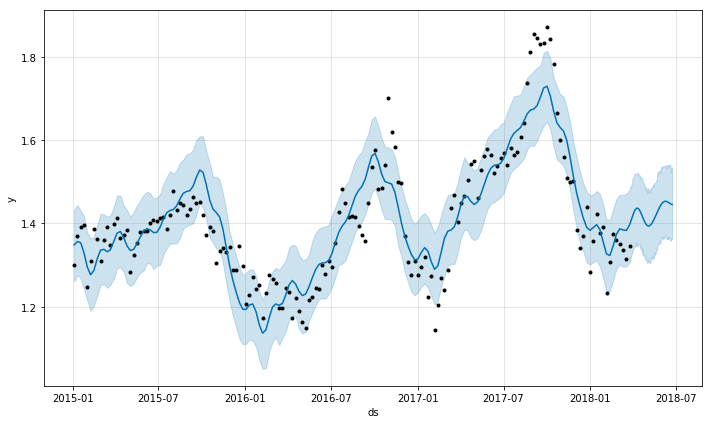

In [10]:
fig1 = model.plot(forecast)

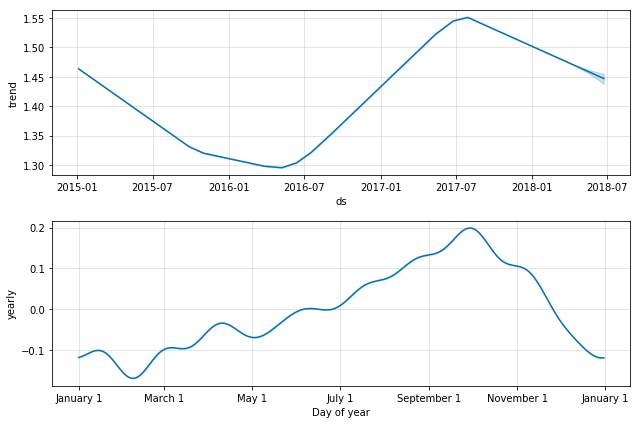

In [11]:
fig2 = model.plot_components(forecast)

In [12]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(model, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 17 forecasts with cutoffs between 2016-01-05 00:00:00 and 2017-12-25 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,9 days,0.011677,0.108061,0.081047,0.057257,0.309524
1,10 days,0.010887,0.104341,0.078217,0.055422,0.333333
2,11 days,0.009002,0.094878,0.069967,0.049439,0.428571
3,12 days,0.008892,0.094296,0.069259,0.048492,0.476190
4,13 days,0.010532,0.102628,0.078946,0.056457,0.444444


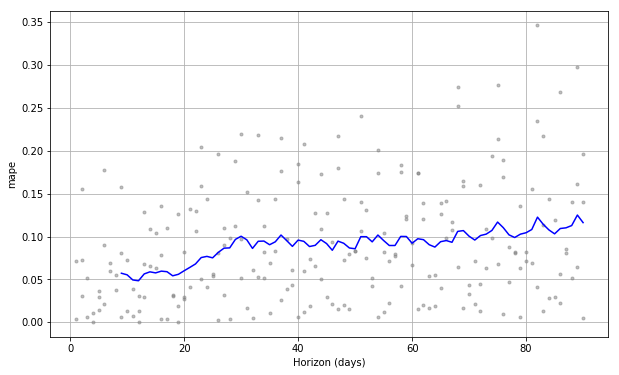

In [13]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')